In [1]:
import matplotlib.pyplot as plt
import numpy as np

from functions import calc_distance_bwn_2_pts

In [2]:
{
    "rafter_dist": 2,
    "ridge_pts": [
        [
            604.5344770153231,
            534.6435709526982
        ],
        [
            666.4931712191872,
            773.4843437708195
        ]
    ],
    "eve_pts": [
        [
            534.5811125916056,
            1040.3064623584278
        ],
        [
            448.6384077281812,
            762.491672218521
        ]
    ],
    "mt_per_px": 0.06431116525314934,
    "roof_pts": [
        {
            "x": 448.6384077281812,
            "y": 762.491672218521
        },
        {
            "x": 604.5344770153231,
            "y": 534.6435709526982
        },
        {
            "x": 666.4931712191872,
            "y": 773.4843437708195
        },
        {
            "x": 534.5811125916056,
            "y": 1040.3064623584278
        },
        {
            "x": 448.6384077281812,
            "y": 762.491672218521
        }
    ]
}

{'rafter_dist': 2,
 'ridge_pts': [[604.5344770153231, 534.6435709526982],
  [666.4931712191872, 773.4843437708195]],
 'eve_pts': [[534.5811125916056, 1040.3064623584278],
  [448.6384077281812, 762.491672218521]],
 'mt_per_px': 0.06431116525314934,
 'roof_pts': [{'x': 448.6384077281812, 'y': 762.491672218521},
  {'x': 604.5344770153231, 'y': 534.6435709526982},
  {'x': 666.4931712191872, 'y': 773.4843437708195},
  {'x': 534.5811125916056, 'y': 1040.3064623584278},
  {'x': 448.6384077281812, 'y': 762.491672218521}]}

In [3]:
mt_per_px = 0.06431113068322548 

In [4]:
sides = {
    "ridge": [
        [
            604.5344770153231,
            534.6435709526982
        ],
        [
            666.4931712191872,
            773.4843437708195
        ],],
    "eve":[
        [
            534.5811125916056,
            1040.3064623584278
        ],
        [
            448.6384077281812,
            762.491672218521
        ]
    ]
}

In [5]:

def check_point_bwn_AB(point, line, tolerence=0.0000001):
    A = line[0]
    B = line[1]
    AC = calc_distance_bwn_2_pts([A, point])
    BC = calc_distance_bwn_2_pts([B, point])
    AB = calc_distance_bwn_2_pts(line)

    status = (AB <= AC+BC+tolerence) & (AB >= (AC+BC)-tolerence)
    return status

In [6]:
rafetr_distance = 3 # in feet

In [7]:
# 1ft = 0.3048 mt
raf_dist_mt = rafetr_distance*0.3048

In [8]:
raf_dist_px = raf_dist_mt / mt_per_px
raf_dist_px

14.21837853394337

In [9]:
def calc_distance(point):

    dist = ( (point[1][0] - point[0][0])**2 + (point[1][1] - point[0][1])**2 )**0.5
    return dist

In [10]:
AB = calc_distance(sides['ridge'])

In [11]:
no_of_rafters = int(AB // raf_dist_px)
no_of_rafters

17

In [12]:

def calc_ratio(distance, len_of_line):
    return distance/len_of_line

calc_ratio(raf_dist_px, AB)

0.057623444660924845

## calculation of projection

In [13]:
# distance_i = raf_dist_px
# point = sides['ridge']
# P = []
# for i in range(8):
#     ratio_i = calc_ratio(distance_i, AB)
#     u = point[0][0] + ratio_i * ( point[1][0] - point[0][0] )
#     v = point[0][1] + ratio_i * ( point[1][1] - point[0][1] )
#     distance_i += raf_dist_px
#     P.append((u,v))

def calc_rafter_pts(ridge_line_pts, rafter_dist_px):
    POINTS = []

    len_of_ridge = calc_distance(ridge_line_pts)
    no_of_rafters = int(len_of_ridge // rafter_dist_px)
    initial_distance = rafter_dist_px
    
    for i in range(no_of_rafters):
        ratio_i = calc_ratio(initial_distance, len_of_ridge)
        u = ridge_line_pts[0][0] + ratio_i * ( ridge_line_pts[1][0] - ridge_line_pts[0][0] )
        v = ridge_line_pts[0][1] + ratio_i * ( ridge_line_pts[1][1] - ridge_line_pts[0][1] )
        initial_distance += raf_dist_px
        POINTS.append((u,v))

    return POINTS

In [14]:
def calc_perpendicular(ridge_pts, rafter_pt, D):
# def calc_perpendicular(x1, y1, x2, y2, Px1, Py1, D):
    x1, y1 = ridge_pts[0][0], ridge_pts[0][1]
    x2, y2 = ridge_pts[1][0], ridge_pts[1][1]
    Px1, Py1 = rafter_pt[0], rafter_pt[1]
    
    ABx = x2 - x1
    ABy = y2 - y1
    
    # Normalize the direction vector
    length_AB = (ABx**2 + ABy**2)**0.5
    ux = ABx / length_AB
    uy = ABy / length_AB
    
    # Perpendicular vector
    vx = -uy
    vy = ux
    
    # Calculate the coordinates of point Q at distance D from P
    Qx1 = Px1 + D * vx
    Qy1 = Py1 + D * vy
    
    return Qx1, Qy1

In [15]:
eve_pts = np.array(sides['eve'])


## calculation of POI

In [16]:
def extract_x_y(line_pts):
    line_pts = np.array(line_pts)
    return line_pts[:, :1].flatten(), line_pts[:, 1:].flatten()

In [17]:
def calc_poi(rafter_pts, eve_pts):
    rafter_pts = np.array(rafter_pts)
    eve_pts = np.array(eve_pts)
    eve_x, eve_y = extract_x_y(eve_pts)
    rafter_x, rafter_y = extract_x_y(rafter_pts)

    eve_dx = eve_x[1] - eve_x[0]
    eve_dy = eve_y[1] - eve_y[0]

    rafter_dx = rafter_x[1] - rafter_x[0]
    rafter_dy = rafter_y[1] - rafter_y[0]

    eve_slope = eve_dy / eve_dx
    rafter_slope = rafter_dy / rafter_dx

    rafter_c = rafter_y[0] - (rafter_slope * rafter_x[0])
    eve_c = eve_y[0] - (eve_slope * eve_x[0])

    x = (rafter_c - eve_c) / (eve_slope - rafter_slope)
    y = (eve_slope*x) + eve_c

    return x, y

In [18]:
def calc_projection(eve_pts, ridge_pts):
    eve_len = calc_distance(eve_pts)
    ridge_len = calc_distance(eve_pts)

    eve_x, eve_y = extract_x_y(eve_pts)
    ridge_x, ridge_y = extract_x_y(ridge_pts)

    eve_start = calc_perpendicular(eve_pts, [eve_x[0], eve_y[0]], 3)
    eve_end = calc_perpendicular(eve_pts, [eve_x[1], eve_y[1]], 3)

    eve_start_proj = calc_poi([eve_pts[0], eve_start], ridge_pts)
    eve_end_proj = calc_poi([eve_pts[1], eve_end], ridge_pts)

    return eve_start_proj, eve_end_proj

In [19]:
calc_projection(sides['eve'], sides['ridge'])

((np.float64(720.7689666238431), np.float64(982.7087808952188)),
 (np.float64(647.6692059140702), np.float64(700.9209936430298)))

## New projection Algorithm

In [20]:

def calc_pt_projection_on_line(line1, line2, pt=2):
    """
    line1: [ [x1,y1], [x2,y2] ] -> the line which the points are referenced
    line2: [ [x1,y1], [x2,y2] ] -> the line which has the projected
    pt: 0 or 1 or 2 -> 0 this will say only first pt will be projected
                   -> 1 this will say only the last pt has to be projected
                -> 2 -> both the points will be projectec and extended if necessary
    returns: ([x1,y1], [x2,y2])
    """
    pt_0_perp_line = [line1[0], calc_perpendicular(line1, line1[0], 1)]
    new_pt_0 = calc_poi(line2, pt_0_perp_line)
 
    if check_point_bwn_AB(new_pt_0, line2):
        new_pt_0 = line2[0]

    if pt==0:
        return [new_pt_0, line2[1]]
    
    pt_1_perp_line = [calc_perpendicular(line1, line1[1], 1), line1[1]]
    new_pt_1 = calc_poi(line2, pt_1_perp_line)
 
    if check_point_bwn_AB(new_pt_1, line2):
        new_pt_1 = line2[1]

    if pt==1:
        return [line2[0], new_pt_1]
        
    return [new_pt_0, new_pt_1]

   
    # return [pt_0_intersection, pt_1_intersection]


# Execution

In [21]:
#rafter_dist_px #known already

projected_line = calc_pt_projection_on_line(sides['eve'], sides['ridge'])
# projected_line = calc_projection(sides['eve'], sides['ridge'])
# projected_line2 = calc_pt_projection_on_line(sides['ridge'], sides['eve'])


# rafter_points = calc_rafter_pts(sides['ridge'], raf_dist_px)
rafter_points = calc_rafter_pts(projected_line, raf_dist_px)
perp_pts = []
temp_p = []
for p in rafter_points:
    print(p)
    # perp = calc_perpendicular(sides['ridge'][0][0], sides['ridge'][0][1], sides['ridge'][1][0], sides['ridge'][1][1], p[0], p[1], 5)
    perp = calc_perpendicular(sides['ridge'], p, 5)
    # print("--",perp)
    rafter_pt = np.array([perp, p])

    temp_p.append(perp)
    projection = calc_poi(rafter_pt, sides['eve'])
    perp_pts.append(projection)

(np.float64(717.1986932371265), np.float64(968.9459528399727))
(np.float64(713.628419850407), np.float64(955.1831247847151))
(np.float64(710.0581464636874), np.float64(941.4202967294576))
(np.float64(706.487873076968), np.float64(927.6574686742001))
(np.float64(702.9175996902484), np.float64(913.8946406189425))
(np.float64(699.3473263035289), np.float64(900.131812563685))
(np.float64(695.7770529168093), np.float64(886.3689845084275))
(np.float64(692.2067795300898), np.float64(872.60615645317))
(np.float64(688.6365061433703), np.float64(858.8433283979125))
(np.float64(685.0662327566507), np.float64(845.0805003426549))
(np.float64(681.4959593699313), np.float64(831.3176722873974))
(np.float64(677.9256859832117), np.float64(817.5548442321399))
(np.float64(674.3554125964922), np.float64(803.7920161768823))
(np.float64(670.7851392097726), np.float64(790.0291881216248))
(np.float64(667.2148658230531), np.float64(776.2663600663673))


In [22]:
temp_p

[(np.float64(712.3588909972291), np.float64(970.2014663917453)),
 (np.float64(708.7886176105096), np.float64(956.4386383364877)),
 (np.float64(705.21834422379), np.float64(942.6758102812302)),
 (np.float64(701.6480708370706), np.float64(928.9129822259727)),
 (np.float64(698.077797450351), np.float64(915.150154170715)),
 (np.float64(694.5075240636315), np.float64(901.3873261154575)),
 (np.float64(690.937250676912), np.float64(887.6244980602)),
 (np.float64(687.3669772901924), np.float64(873.8616700049425)),
 (np.float64(683.7967039034729), np.float64(860.098841949685)),
 (np.float64(680.2264305167533), np.float64(846.3360138944274)),
 (np.float64(676.6561571300339), np.float64(832.5731858391699)),
 (np.float64(673.0858837433143), np.float64(818.8103577839124)),
 (np.float64(669.5156103565948), np.float64(805.0475297286548)),
 (np.float64(665.9453369698753), np.float64(791.2847016733973)),
 (np.float64(662.3750635831557), np.float64(777.5218736181398))]

In [28]:
r_x, r_y = extract_x_y(np.array(sides['ridge']))
raf_x, raf_y = extract_x_y(rafter_points)

e_x, e_y = extract_x_y(sides['eve'])

raf_eve_x, raf_eve_y = extract_x_y(perp_pts)

# exp_x, exp_y = extract_x_y(calc_projection(sides['eve'], sides['ridge']))
exp_x, exp_y = extract_x_y(projected_line)
# exp_x1, exp_y1 = extract_x_y(projected_line2)


In [29]:
rafter_points[0][0], perp_pts[0][0]

(np.float64(717.1986932371265), np.float64(527.7119542245032))

In [30]:
roof_side1 = extract_x_y([sides['ridge'][0], sides['eve'][0]])
roof_side2 = extract_x_y([sides['ridge'][1], sides['eve'][1]])

### Just Displaying the points in graph

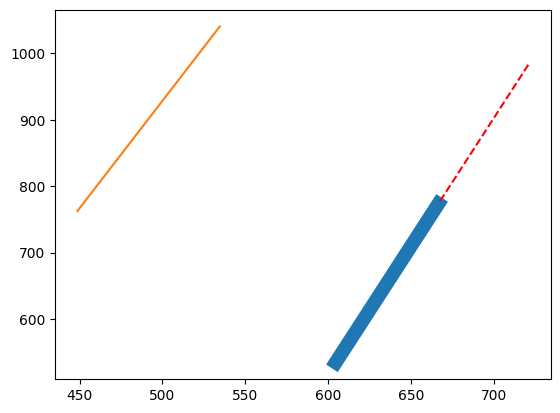

In [33]:
def plot_img():

    plt.plot(r_x, r_y, label="ridge", linewidth=10)
    # plt.scatter(raf_x, raf_y)

    plt.plot(e_x, e_y, label="eve")
    # plt.scatter(raf_eve_x, raf_eve_y)

    # plt.plot(roof_side1[0], roof_side1[1], c='blue', linestyle="dashed" )
    # # plt.plot(roof_side2[0], roof_side2[1], c='blue', linestyle="dashed" )
    
    # for pt in range(len(raf_eve_x)):
    #     temp_x = [rafter_points[pt][0], perp_pts[pt][0]]
    #     temp_y = [rafter_points[pt][1], perp_pts[pt][1]]
    #     plt.plot(temp_x, temp_y, c='black')
    # plt.legend()
    plt.plot(exp_x, exp_y, c="r", linestyle="dashed")
    # plt.plot(exp_x1, exp_y1, c="g", linestyle="dashed")
    # plt.show()
    
    # plt.scatter(18.860524810780408, 26.028350181857476)
    
    # plt.ylim(0,100)

plot_img()

In [340]:
calc_poi(sides['ridge'], sides['eve'])

(np.float64(1780.5172154669633), np.float64(5067.867353048539))

In [284]:
# perp = calc_perpendicular(10, 20, 90, 29, P[0][0], P[0][1], 25) 

In [285]:
rafter_line = np.array([P[0], perp])
eve_line = np.array(sides['eve'])
eve_line, rafter_line

NameError: name 'P' is not defined

In [286]:
sides['ridge']

[[604.5344770153231, 534.6435709526982],
 [666.4931712191872, 773.4843437708195]]

In [149]:
Mi = []
for p in P:
    rafter = calc_perpendicular(10, 20, 90, 29, P[0][0], P[0][1], 25) 

(19.419498676119733, 21.05969360106347)
(28.838997352239467, 22.11938720212694)
(38.2584960283592, 23.17908080319041)
(47.677994704478934, 24.23877440425388)
(57.097493380598664, 25.29846800531735)
(66.51699205671841, 26.35816160638082)
(75.93649073283812, 27.41785520744429)
(85.35598940895787, 28.47754880850776)


In [147]:
meet_point = calc_poi(eve_line, rafter_line)
meet_point

(array([16.11832432]), array([50.40346568]))

In [132]:
-0.04424779*7+50

49.69026547

In [135]:
-0.1125*19.419498676119733 + 21.05969360106347

18.875

## Drawing Roof Inner Plane

In [261]:
pts = [
    {
        "x": 813.4576948700866,
        "y": 302.7981345769487
    },
    {
        "x": 609.5936042638241,
        "y": 582.6115922718187
    },
    {
        "x": 654.5636242504996,
        "y": 713.5243171219187
    },
    {
        "x": 1007.3284477015322,
        "y": 840.439706862092
    },
    {
        "x": 813.4576948700866,
        "y": 302.7981345769487
    }
]

In [268]:
for i in range(len(pts)):
    if(i<len(pts)-1):
        print(pts[i], pts[i+1])


{'x': 813.4576948700866, 'y': 302.7981345769487} {'x': 609.5936042638241, 'y': 582.6115922718187}
{'x': 609.5936042638241, 'y': 582.6115922718187} {'x': 654.5636242504996, 'y': 713.5243171219187}
{'x': 654.5636242504996, 'y': 713.5243171219187} {'x': 1007.3284477015322, 'y': 840.439706862092}
{'x': 1007.3284477015322, 'y': 840.439706862092} {'x': 813.4576948700866, 'y': 302.7981345769487}
